# Notebook for Monte-Carlo Simulation

In [1]:
## Import Various Packages 

%load_ext autoreload
%autoreload 2

%load_ext line_profiler
# Import files related to the model
from project_code.Simulation import simulate
from project_code import EGM
from project_code import tools
from project_code import DC_EGM
from project_code import Estimation as est

# Import General packages 
import numpy as np
from scipy import optimize
from project_code.model import Model
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
import project_code.auxiliary_funcs as af
import time as time
import copy as copy
import pandas as pd 

import warnings
warnings.filterwarnings('ignore') #:)

In [2]:
# Parameters used 
par2 = {'a_max':100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 1,
        'phi_high': 5,
        'phi_low': 1,
        'theta_high':0.66,
        'theta_low':0.33,
        'lambda_max':0.797
        }

In [3]:
# Set up of the model
model = Model() # Load model
model.setup() # Set initial parameters 

# solution and simulation specs
model.par.Na = 200
model.par.Tmax = 45
model.par.Tsim = model.par.Tmax
model.par.Ntypes = 4
model.par.N = 10000
model.par.Ns = 10
# set parameters to those in par2
for key, val in par2.items():
    model.par.__setattr__(key, val)

model.par.easy_par=False # Not used

# Set grids
model.set_grids()

par = model.par
sol = model.sol
sim = model.sim

In [4]:
# Solve Model 
model.solve()
print("Model Solved")

Model Solved


# 1) Monte Carlo Experiment I 

In [5]:
run = False # Change to True to Run the Experiment

if run == True: 
    # Initialize 
    Results = {}  # Dictionary for results
    dist_true = [0.25,0.25,0.25,0.25] # True parameters 
    N = 50 # Number of MC iterations 

    for i in range(N): 

        par.dist = dist_true # Reset distribution to the true distribution

        est.reset_sim(sim,model) # Allocate simulation grids

        # Change Seed 
        seed_obj = np.random 
        seed_obj.seed(1667+i)
        par.random = seed_obj

        simulate(sim,sol,par) # Simulate 
        
        data = model.sim  # Save simulation results
 
        sec = time.time() # Start timing

        res,_ = est.estimate(est.obj,data,model,[0.2,0.8]) # Estimate from geuss

        time_it = time.time() - sec # Calculate Time

        # Dictionary with results for iteration i
        result = {  "p1" : res.x[0], 
                    "p2" : res.x[1], 
                    "fun" : res.fun, 
                    "Succes" : res.success,
                    "Time" : time_it }
        
        Results[f"result_{i}"] = result # Save results 

    # Export experiment I to Pickle
    obj_result = Results 
    file_result = open('pickles/MC.obj1','wb')
    pickle.dump(obj_result,file_result,protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# Open results 
file_open = open('pickles/MC.obj1','rb')
saved_result = pickle.load(file_open)

# Change to dataframe 
Data_1 = pd.DataFrame(saved_result).T

In [7]:
Data_1.mean() # Find mean

p1          0.498669
p2          0.504933
fun         1.134314
Succes      1.000000
Time      494.140044
dtype: float64

In [8]:
Data_1.std() # Find Standard Deviation

p1         0.020218
p2         0.025277
fun        0.741926
Succes     0.000000
Time      43.226303
dtype: float64

# 2) Monte Carlo Experiment II 

## 2.1) Monte Carlo  

In [5]:
run = True # Change to True to run

sol_true = copy.deepcopy(sol) # Save Actual Solution

if run == True: 
    # Initialize
    Results = {} # Dictionary for results
    
    # True parameters 
    dist_true = [0.25,0.25,0.25,0.25] 
    phi_high_true = 5

    N = 50 # Number of MC iterations 

    for i in range(N): 

        par.dist = dist_true # Set true distribution

        

        # Set Seed
        seed_obj = np.random
        seed_obj.seed(1687+i)
        par.random = seed_obj 

        setattr(model.par, "phi_high", phi_high_true) # Set true transfers 
        est.reset_sim(sim,model)  # Allocation of simulation grids
        simulate(sim,sol_true,par) # Simulate
        
        data = model.sim # Save simulation

        sec = time.time() # Starting timing

        res = est.estimate_transfer(data,model,[0.2,0.8,3]) # Estimate 

        time_it = time.time() - sec #Calculate time

        # Dictionary for results of iteration i
        result = {  "p1" : res.x[0], 
                    "p2" : res.x[1],
                    "Phi_high" : res.x[2], 
                    "fun" : res.fun, 
                    "Succes" : res.success,
                    "Time" : time_it }
        
        Results[f"result_{i}"] = result # Save results

    # Export experiment II to Pickle
    obj_result = Results 
    file_result = open('pickles/MC.obj2','wb')
    pickle.dump(obj_result,file_result,protocol=pickle.HIGHEST_PROTOCOL)

1506.4929873266274
1475.4215463735493
1541.0303750920077
1295.1211153045952
1309.552328194218
1220.408573496054
1100.047182637376
1028.4151260332508
860.6190122730887
874.3941593391007
664.2338578535995
456.45587232005096
438.86090400725556
249.1356201421487
236.13188182485172
113.90841319837497
50.52225165821925
112.05014277328073
59.087064337077514
167.86420028694684
79.17812884825292
127.36722415562228
66.67653797232613
67.02747206406521
54.06804336935823
39.747622286659265
38.28609627880004
45.17538008653032
26.243890861653846
23.99763694820753
18.920294731396933
26.527933949049984
85.13977267172058
25.040245664200683
8.783973830215693
4.0790979103416145
13.15271979905904
3.5892614668133334
11.31739020630993
7.20284987337828
17.550507001461973
4.650660786062249
12.12908666280511
2.7210058914827404
4.065491474294534
8.706258761246028
2.173882749923189
5.628164645221135
2.42196389155466
4.238540907581674
2.4440956325567527
2.8681111919880644
2.2139843958022696
3.003058254055903
2.142

## 2.1) Play around with the results from Experiment II 

In [62]:
    import pickle
    obj_result = Results 
    file_result = open('pickles\MC.obj2_1','wb')
    pickle.dump(obj_result,file_result,protocol=pickle.HIGHEST_PROTOCOL)

In [61]:
Results

{'result_0': {'p1': 0.2872183712492122,
  'p2': 0.5313920051284292,
  'Phi_high': 5.8088221124248705,
  'fun': 1.7660903533651013,
  'Succes': True,
  'Time': 942.0706202983856},
 'result_1': {'p1': 0.19261056057253884,
  'p2': 0.48659555143186417,
  'Phi_high': 6.185540861478181,
  'fun': 5.6369322457218685,
  'Succes': True,
  'Time': 957.3301904201508},
 'result_2': {'p1': 0.17635365923884475,
  'p2': 0.5200444005824809,
  'Phi_high': 6.231178650198334,
  'fun': 4.859023395216351,
  'Succes': True,
  'Time': 839.6089062690735},
 'result_3': {'p1': 0.4727726749806141,
  'p2': 0.5056757403441714,
  'Phi_high': 5.232506319805983,
  'fun': 2.8844809761735055,
  'Succes': True,
  'Time': 1124.6744277477264},
 'result_4': {'p1': 0.8122254587265143,
  'p2': 0.4677647028805755,
  'Phi_high': 3.845262958832757,
  'fun': 0.5574091598898017,
  'Succes': True,
  'Time': 1106.6656794548035},
 'result_5': {'p1': 0.6083539687561392,
  'p2': 0.5156017267037022,
  'Phi_high': 4.695366764156562,
  'f

In [63]:
# Open results 
file_open = open('pickles\MC.obj2_1','rb')
saved_result = pickle.load(file_open)

In [54]:
# Change to dataframe 
Data_2 = pd.DataFrame(saved_result).T
Data_2.max()

p1             0.812225
p2             0.558104
Phi_high       6.338848
fun           10.319393
Succes             True
Time        1270.167057
dtype: object

In [44]:
I = Data_2.fun == 0.21942720162453672
Data_2[I]

,p1,p2,Phi_high,fun,Succes,Time
result_31,0.556604,0.503367,4.713226,0.219427,True,814.790231


In [23]:
Data_2.mean() # Find mean

p1            0.284151
p2            0.507332
Phi_high      5.854516
fun           3.593370
Succes        1.000000
Time        798.896610
dtype: float64

In [24]:
Data_2.std() # Find Standard Deviation

p1            0.174360
p2            0.022610
Phi_high      0.672460
fun           2.166467
Succes        0.000000
Time        172.331151
dtype: float64

(array([ 1.,  1.,  0.,  6.,  2.,  2.,  0.,  2.,  3., 33.]),
 array([3.845262958832757, 4.09462149564039, 4.343980032448024,
        4.593338569255657, 4.84269710606329, 5.092055642870923,
        5.341414179678557, 5.59077271648619, 5.840131253293823,
        6.089489790101457, 6.33884832690909], dtype=object),
 <BarContainer object of 10 artists>)

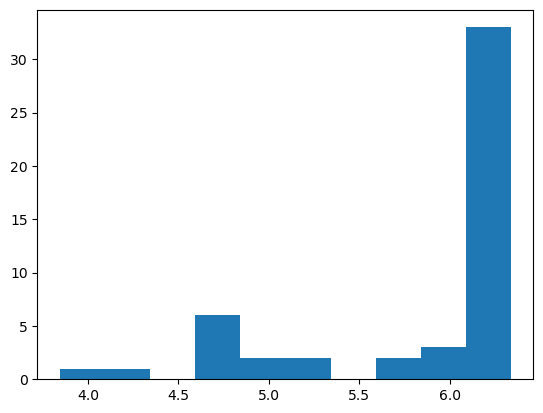

In [28]:
plt.hist(Data_2.Phi_high)

In [14]:
# Unpack results 
phi_highs = np.empty(50)
p1s = np.empty(50)
p2s = np.empty(50)

for i in range(50): 
    phi_highs[i] = saved_result[f'result_{i}']["Phi_high"]
    p1s[i] = saved_result[f'result_{i}']["p1"]
    p2s[i] = saved_result[f'result_{i}']["p2"]

## 2.3) Make a scatter plot over the estimates of phi high and p1 

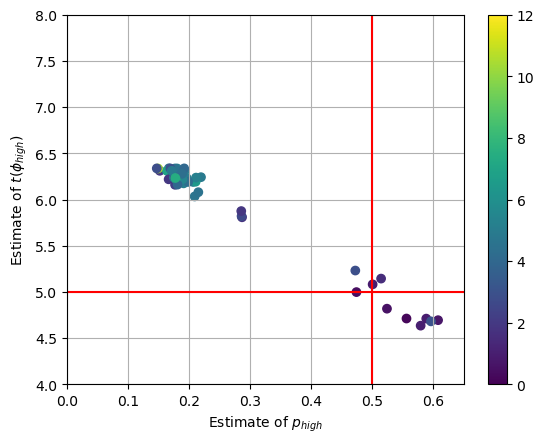

In [57]:
# Make scatter plot that shows the correlation 

cm = plt.cm.get_cmap('viridis')
fig,ax = plt.subplots(1,1)

graph = ax.scatter(Data_2.p1,Data_2.Phi_high,c=Data_2.fun, cmap=cm,vmin=0,vmax=12)

ax.set_ylabel("Estimate of $t(\phi_{high})$")
ax.set_xlabel("Estimate of $p_{high}$")
ax.grid()
ax.set_ylim([4,8])
ax.set_xlim([0,0.65])

plt.colorbar(graph)
ax.vlines(0.5,0,10,color="red")
ax.hlines(5,0,10,color="red")

fig.savefig(r"figs\scatter_phi_p_2.png")

In [16]:
# Inspect Outliers 
I = Data_2.fun>6
Data_2[I]

,p1,p2,Phi_high,fun,Succes,Time
result_24,0.211744,0.494812,6.759836,51.70163,True,792.346431
result_28,0.09437,0.434419,7.22307,77.656059,True,643.925917


# 3) Plot Criterion Functions 

## 3.1) Criterion Function for Experiment I 

In [17]:
# Set up of the model
model = Model() # Load model
model.setup() # Set initial parameters 

# solution and simulation specs
model.par.Na = 200
model.par.Tmax = 45
model.par.Tsim = model.par.Tmax
model.par.Ntypes = 4
model.par.N = 10000
model.par.Ns = 10
# set parameters to those in par2
for key, val in par2.items():
    model.par.__setattr__(key, val)

model.par.easy_par=False # Not used

# Set grids
model.set_grids()

par = model.par
sol = model.sol
sim = model.sim

# Simulate and find income shares 
model.solve()
simulate(sim,sol,par)
data = copy.deepcopy(sim)
data_true = data 
share_Rich = np.sum((data_true.type == 0) + (data_true.type == 2)) / len(data_true.type) 
share_Poor = 1-share_Rich


In [19]:
run = True # Change to True to run

if run:
    N = 10 # Points in each dimension

    # Set values 
    p1s = np.linspace(1e-8, 1-1e-8, N)
    p2s = np.linspace(1e-8, 1-1e-8, N)

    criterion = np.zeros((N,N)) # Grid to save values 

    for i1,p1 in enumerate(p1s): # Find criterion value for each point in p1s x p2s 
        for i2,p2 in enumerate(p2s):
            c = est.obj([p1,p2], data, model, [share_Rich, share_Poor], "I")
            criterion[i1,i2] = c

    to_file = (p1s, p2s, criterion) # Make ready to save 

    with open('pickles/criterion_plot_10000','wb') as file: # Save File 
        pickle.dump(to_file, file)

625.8600312987243
489.6750323877614
395.4109266775904
325.75164476259357
291.81295428325683
288.87623185714256
306.0502200410197
363.54080828274977
455.2317120717853
580.1587447500498
517.4631913961059
385.3312695530012
281.733567201929
215.88317808934823
181.4526983061393
171.7423176970542
192.96213583788335
252.37825152760104
341.67435935976255
464.77591100941294
435.9731717692759
295.25897828859945
197.10442673603495
131.80338871965574
92.1392998339979
85.69514052601654
110.39920043380943
167.91841748647403
256.9777650741464
384.2480761667051
381.58398192744124
244.64633731097172
147.4673303292551
75.54174584909414
36.713369858051315
29.16790035953254
54.02863152538467
110.04475944012732
201.46559424333185
323.2623123215981
357.9241159556097
224.69619603215267
123.18427744078818
50.09808676575034
10.048958600020022
3.4152662889407805
28.371707095328212
86.29443828116129
175.06500374941083
304.24691041761537
364.4580637258556
229.59758149999288
126.79165339875968
52.16920306555758
14

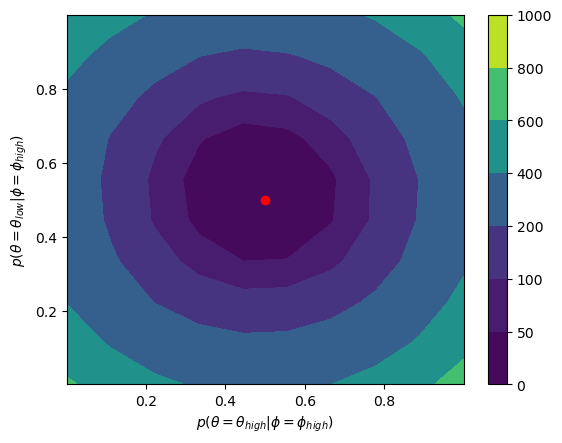

In [20]:
# Plot the criterion function using the values from above
%matplotlib inline

with open('pickles/criterion_plot_10000', 'rb') as file:
    p1s, p2s, criterion = pickle.load(file)

p1_mesh, p2_mesh = np.meshgrid(p1s, p2s,  indexing='ij')

fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(p1_mesh, p2_mesh, criterion, cmap='viridis', levels = [0,50, 100, 200, 400, 600, 800, 1000])
ax.set_xlabel(r'$p_{high}$')
ax.set_ylabel(r'$p_{low}$')
ax.scatter(0.5, 0.5, color='red')

cbar = fig.colorbar(contour)

fig.savefig('figs/criterion_p1p2.png')

## 3.2) Criterion functions for Experiment II 

In [21]:
model_easy = Model()
model_easy.setup()

# solution and simulation specs
model_easy.par.Na = 200
model_easy.par.Tmax = 45
model_easy.par.Tsim = model.par.Tmax
model_easy.par.Ntypes = 4
model_easy.par.N = 10000

# set parameters
for key, val in par2.items():
    model_easy.par.__setattr__(key, val)

model_easy.par.easy_par = False
model_easy.set_grids()

print('Setup done')

model_easy.solve()
print('Model solved')

simulate(model_easy.sim, model_easy.sol, model_easy.par)
print('Model simulated')



Setup done
Model solved
Model simulated


In [22]:
data_easy = copy.deepcopy(model_easy.sim)

In [23]:
# Criterion function, fix p2=0.5
# tranfsers and p1
run = True

if run:
    p2 = 0.5
    N = 10
    p1_grid = np.linspace(1e-8, 1-1e-8, N)
    phi_grid = np.linspace(2, 8, N)
    p1_mesh, phi_mesh = np.meshgrid(p1_grid, phi_grid, indexing='ij')

    cri1_mesh = np.zeros((N,N)) + np.nan

    for i1,p1 in enumerate(p1_grid):
        for ip,phi in enumerate(phi_grid):
            c = est.obj_transfer([p1,p2, phi], data_easy, model_easy, [share_Rich, share_Poor], "I")
            cri1_mesh[i1,ip] = c

    to_file = (p1_grid, phi_grid, cri1_mesh)

    with open('pickles/criterion_plot_p1phi','wb') as file:
        pickle.dump(to_file, file)

5104.505389026996
2927.03677280563
1611.1103085398327
872.0131239783359
430.3258413123473
182.9440794215419
57.19585888360161
11.489517965853207
24.11814494382959
75.07840267361537
4463.405271170876
2391.161230103644
1241.4997922988507
628.3318583292189
279.537614723562
97.83719189303707
20.62364032657424
9.73506300365846
46.60521698656391
114.92630979223196
3891.8110098335173
1907.962690906495
917.5305952627691
422.8943318714366
159.31955477856835
38.905603342442106
4.099635406816343
25.217445334168325
84.21136356457096
168.75736004113946
3374.546551042429
1491.142201321132
644.6950903372424
257.3012947244413
72.03233409791014
6.830501710116107
10.147401142437065
59.371355423370694
137.40286033844717
234.7033232243483
2916.4184999234094
1122.4838498242989
418.41868579338734
131.2578439900373
19.465365660918348
3.3512848438089753
41.51096253722099
116.95955912748263
211.58702673289451
318.9171552393567
2521.062169320974
813.6434977169929
243.68145933738674
49.514660599385806
0.90150935

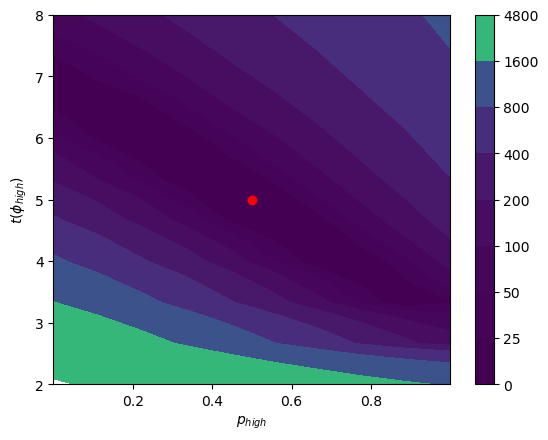

In [24]:
%matplotlib inline

with open('pickles/criterion_plot_p1phi', 'rb') as file:
    p1s, phi_grid, cri1_mesh = pickle.load(file)

p1_mesh, phi_mesh = np.meshgrid(p1s, phi_grid, indexing='ij')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
contour = ax.contourf(p1_mesh, phi_mesh, cri1_mesh, levels=[0, 25, 50, 100, 200, 400, 800, 1600, 4800])
ax.set_xlabel(r'$p_{high}$')
ax.set_ylabel('$t(\phi_{high})$')

cmap = fig.colorbar(contour)

ax.scatter(0.5, 5, label='True value', color='red')

fig.savefig('figs/criterion_p1phi.png')

In [25]:
# Criterion function, fix p1=0.5
# transfers and p2

run = True

if run:
    p1 = 0.5
    N = 10
    p2_grid = np.linspace(1e-8, 1-1e-8, N)
    phi_grid = np.linspace(2, 8, N)
    p2_mesh, phi_mesh = np.meshgrid(p2_grid, phi_grid, indexing='ij')

    cri2_mesh = np.zeros((N,N)) + np.nan

    for i2,p2 in enumerate(p2_grid):
        for ip,phi in enumerate(phi_grid):
            c = est.obj_transfer([p1,p2, phi], data, model, [share_Rich, share_Poor], "I")
            cri2_mesh[i2,ip] = c

    to_file = (p2_grid, phi_grid, cri2_mesh)

    with open('pickles/criterion_plot_p2phi','wb') as file:
        pickle.dump(to_file, file)

3056.901966945079
1309.9149211431145
679.1614423917426
439.6804501803078
361.5007283780331
368.8935563816686
422.6703741815518
508.89205749575865
612.4994782897311
724.7043580722589
2922.977158148188
1176.657424174602
545.06574379413
305.7115517417878
228.0885629846381
235.63200503528856
288.4150776140782
374.40113065832145
476.78114053237607
588.7340147299724
2824.472397389531
1069.8003808823044
444.31204605192977
205.33748798688288
127.61336047466824
134.5119334444713
186.79027754933537
272.97883114938855
375.46055608171355
487.0414054425497
2761.005997415853
1003.5583515644598
373.7548176621815
133.1786235978596
53.274682336870654
58.56148413044698
109.15300422927919
193.97330322740788
295.6806458172865
408.14440022141844
2715.890156431249
964.3097850524123
332.6254034787331
93.09119216660761
13.605999940274923
19.499862867807664
72.17128453344792
157.96048765162362
257.8349283325377
368.51222152930757
2706.8251311943495
957.7594068755747
326.9131589366863
86.8431555355434
7.2369744

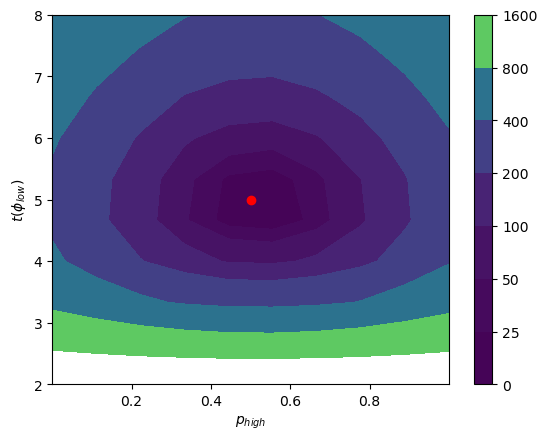

In [26]:
%matplotlib inline

with open('pickles/criterion_plot_p2phi', 'rb') as file:
    p2s, phi_grid, cri2_mesh = pickle.load(file)

p2_mesh, phi_mesh = np.meshgrid(p2s, phi_grid, indexing='ij')

fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(p2_mesh, phi_mesh, cri2_mesh, cmap='viridis', levels=[0, 25, 50, 100, 200, 400, 800, 1600])
ax.set_xlabel(r'$p_{high}$')
ax.set_ylabel('$t(\phi_{low})$')

cmap = fig.colorbar(contour)

ax.scatter(0.5, 5, color='red')

fig.savefig('figs/criterion_p2phi.png')